In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0d2b655771aa9d91b20336c85efd9d0df4b268cfa85e79676a9febb7b13fdcc2
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Deep Learning (前期)

- 講義の後半で毎回、課題に取り組む。
- 締め切り
    - 第1回~第7回の課題を、**第7回(6/4)の講義終了**までに提出すること。
    - 第8回~第14回の課題を、**第14回(8/27)の講義終了**までに提出すること。
- 各締切後に解答をお配りします。
- 第14回の課題を前期の試験とします。
- 講義の度にこのファイルを更新していきます。
- このファイルを編集して、TeamsのAssignmentsの中で提出してください。ファイル名は変更せずにこのままでお願いします。
- 部分点を付けるので、完答していなくても出来たところまで記述してください。
- 課題や講義のことで質問がありましたら、TeamsのGeneralにある`質問箱`でお願いします。次回の講義でお答えします。

### 第1回

1. 正方形の中に一様なランダムな点を $10,000$ 個作り、その正方形に内接する円が何個の点を含んでいるか数えるプログラムをPythonで実装しなさい。そして円周率を近似的に求めなさい。

![](https://geometryhelp.net/wp-content/uploads/2019/08/Circle-inscribed-in-a-square.jpg)

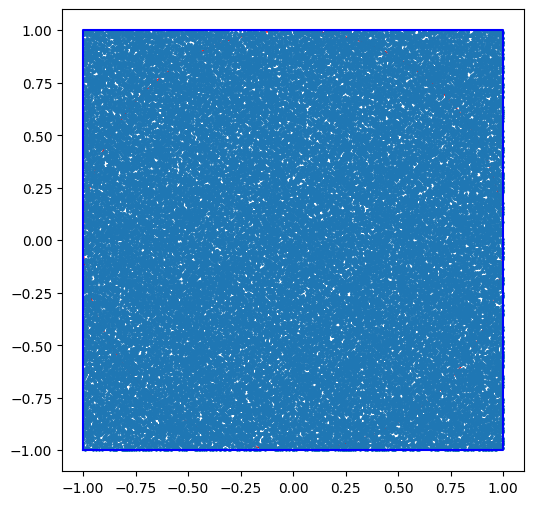

In [ ]:
square_side = 2.0   # 正方形の辺の長さ
radius = square_side / 2    # 円の半径
points_num = 100000  # 点の数


# 正方形の頂点を定義
square_points = np.array([[-radius, -radius], [radius, -radius], [radius, radius], [-radius, radius], [-radius, -radius]])

# 正方形を描画
plt.figure(figsize=(6,6))
plt.plot(square_points[:,0], square_points[:,1], 'b-')  # 青い線で正方形を描画
plt.xlim(-radius-0.1, radius+0.1)
plt.ylim(-radius-0.1, radius+0.1)
plt.gca().set_aspect('equal', adjustable='box')


circle = plt.Circle((0, 0), radius, color='r', fill=False)  # 赤い線で円を描画
plt.gca().add_artist(circle)

random_array = np.random.rand(points_num, 2) * square_side - radius  # 乱数生成
plt.scatter(random_array[:,0], random_array[:,1], s=1)  # 正方形の中に点を描画


plt.show()

In [ ]:
np.random.rand(10000, 2) * square_side - radius

array([[ 0.48413992, -0.71034009],
       [ 0.07790794, -0.55078025],
       [ 0.13619903,  0.35753001],
       ...,
       [ 0.64183432,  0.75155161],
       [-0.82636891,  0.44201355],
       [-0.79656291, -0.99082803]])

In [ ]:
# 円に含まれる点の数
inside_circle = np.sum(np.square(random_array).sum(axis=1) < np.square(radius))

# 円周率の近似値計算 (円内の点の数 / 点の総数 * 4)
pi_approx = inside_circle / points_num * 4

print("円内の点:", inside_circle)
print("円周率:", pi_approx)

円内の点: 78637
円周率: 3.14548


2. 行列 $A= \begin{pmatrix}
8 & 3 \\
2 & 7 \\
\end{pmatrix}$
について、固有値と固有ベクトルを求め対角化しなさい。途中式をLaTeXで示しなさい。

3. 人工知能という用語を定義しなさい。文献をまとめても、個人の意見でもよい。

4. 人工知能について興味のある技術を調べなさい。

## 第2回

1. $1$ 次元確率分布をひとつ選び、その性質について述べなさい。ただし、ガウス分布(正規分布)以外の有限の分散を持つ確率分布を選ぶこと。

以下、Pythonで実装しなさい。

2. 問1の確率分布に従う $n$ 個の乱数を独立に生成し、平均値 $m$ と分散 $\sigma^2$ を返す関数をLibraryを用いずに実装しなさい。
3. 問2で実装した関数を $l$ 回実行し、$m$ の度数分布をプロットしなさい。(横軸：$m$, 縦軸：$m$ の度数 )
4. 問3の度数分布の平均値と分散を答えなさい。

In [ ]:
from scipy.stats import binom

In [ ]:
# 1から6をランダムにn個生成する

n = 100000
def dice(n):
    return np.random.randint(low=1, high=7, size=n, dtype=np.int8)

In [ ]:
# 平均を返す関数

def mean(l):
    length = len(l)
    return sum(l) / length

In [ ]:
# 分散を返す関数

def dispersion(l):
    mu = mean(l)
    sig = []
    for x in l:
        sig.append(np.square(x - mu))
    return mean(sig)

In [ ]:
def dice_mean_disp(n):
    l = dice(n)
    m = mean(l)
    d = dispersion(l)
    return m, d

m, d = dice_mean_disp(10000)
print(f"平均: {m}")
print(f"分散: {d}")


平均: 3.4814
分散: 2.9026540399999545


### 3. 問2で実装した関数を $l$ 回実行し、$m$ の度数分布をプロットしなさい。(横軸：$m$, 縦軸：$m$ の度数 )

In [ ]:
l = 10

for i in range(l):
    m, d = dice_mean_disp(10000)


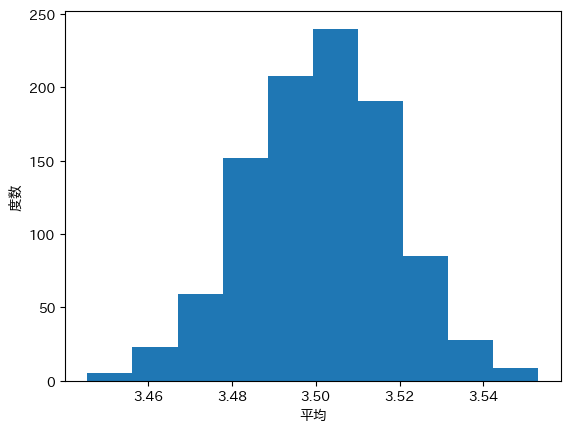

In [ ]:
l = 1000  # 実行回数
m_list = []

for i in range(l):
    m, d = dice_mean_disp(10000)
    m_list.append(m)

plt.hist(m_list, bins=10)  # 度数分布をプロット
plt.xlabel("平均")  # 横軸ラベル
plt.ylabel("度数")  # 縦軸ラベル
plt.show()  # グラフ表示

### 4. 問3の度数分布の平均値と分散を答えなさい。

In [ ]:
m = mean(m_list)
d = dispersion(m_list)

print(f"平均: {m}")
print(f"分散: {d}")

平均: 3.501128300000001
分散: 0.0002999604291100001




---



## 第3回

1. 次の行列をPyTorch・自前の実装(ライブラリを用いない)・手計算(LaTeX)によってそれぞれで計算しなさい。手計算は途中式を書くこと。
$$
 \begin{pmatrix}2&-3\\7&-1\\3&4\end{pmatrix}
  \begin{pmatrix}3\\2\end{pmatrix}
+ \begin{pmatrix}2\\8\\9\end{pmatrix}
$$

### 手計算(LaTeX)

$$
 \begin{pmatrix}2&-3\\7&-1\\3&4\end{pmatrix}
  \begin{pmatrix}3\\2\end{pmatrix}
+ \begin{pmatrix}2\\8\\9\end{pmatrix}\\ =
\begin{pmatrix}
2*3 + -3*2 \\
7*3 + -1*2 \\
3*3 + 4*2
\end{pmatrix}
+ \begin{pmatrix}2\\8\\9\end{pmatrix}\\ =
\begin{pmatrix}
0 \\
19 \\
17
\end{pmatrix}
+ \begin{pmatrix}2\\8\\9\end{pmatrix}\\ =
\begin{pmatrix}
2 \\
27 \\
26
\end{pmatrix}
$$


In [ ]:
# PyTorch
import torch

# 行列を設定
A = torch.tensor([[2, -3], [7, -1], [3, 4]])
b = torch.tensor([[3], [2]])
c = torch.tensor([[2], [8], [9]])

# 計算
result = A @ b + c

print(result)


tensor([[ 2],
        [27],
        [26]])


In [ ]:
# 自前実装


2. 2値分類においてNeuralNetモデルはSigmoid関数を出力するが、3値分類ではSoftmax関数を出力する。ここでは、入力を $(x_1, x_2, x_3)$ , 出力を $(y_1, y_2, y_3)$ とする。$x_1 =5.5, x_2 = 2.1$ と固定し、横軸 $x_3$ , 縦軸 $(y_1, y_2, y_3)$ をそれぞれプロットしなさい。そして、$y_1 + y_2 + y_3 = 1$ となることを確かめなさい。

In [ ]:
#　入力値を作成
x = torch.tensor([[5.5, 2.1, 0.0]])

In [ ]:
# Softmax関数を定義
def Softmax(x):
    return torch.nn.functional.softmax(x, dim=1)

In [ ]:
# Softmax関数で出力
y = Softmax(x)
y

tensor([[0.9639, 0.0322, 0.0039]])

In [ ]:
print(y[0][0] + y[0][1] + y[0][2])

tensor(1., dtype=torch.float64)


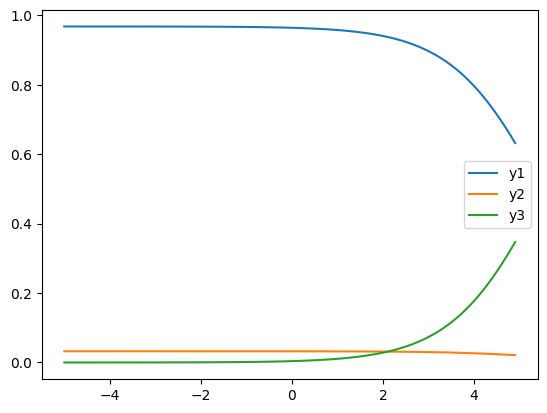

In [ ]:
# プロット
x_axis = np.arange(-5.0, 5.0, 0.1)
y1 = []
y2 = []
y3 = []

for x3 in x_axis:
    x = torch.tensor([[5.5, 2.1, x3]])
    y = Softmax(x)
    y1.append(y[0][0].item())
    y2.append(y[0][1].item())
    y3.append(y[0][2].item())

plt.plot(x_axis, y1, label='y1')
plt.plot(x_axis, y2, label='y2')
plt.plot(x_axis, y3, label='y3')
plt.legend()
plt.show()

In [ ]:
# y1 + y2 + y3 = 1 を確認
for i in range(len(x_axis)):
    print(y1[i] + y2[i] + y3[i])

0.9999999999999998
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999998
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999998
0.9999999999999998
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999998
0.9999999999999998
1.0
0.9999999999999999
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999998
1.0
0.99999999999

## 第4回

1. 2値分類の3層ニューラルネットをPyTorchで実装し、問題なく動作するか確かめなさい。activationにReLU関数を用いなさい。

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# linear定義
linear = nn.Linear(4, 3)

In [ ]:
# relu定義
relu = nn.ReLU()

In [ ]:
# 入力データを作成
x = torch.randn(1, 4)
x

tensor([[ 0.8729, -0.3293, -0.1940, -0.2396]])

In [ ]:
# 線形変換
y = linear(x)
y

tensor([[0.1335, 0.3390, 0.0816]], grad_fn=<AddmmBackward0>)

In [ ]:
# ReLU関数実行
y = relu(x)
y

tensor([[0.8729, 0.0000, 0.0000, 0.0000]])

In [ ]:
# モデル定義
def Net(x):
    n = 3
    while n > 0:
        linear = nn.Linear(n+1, n)
        x = relu(linear(x))
        n -= 1
    return x

In [ ]:
y = Net(x)
print(y)

tensor([[0.]], grad_fn=<ReluBackward0>)


2. ReLU関数以外のactivationを調べ、PyTorchで試しなさい。

In [ ]:
# シグモイド関数
sigmoid = nn.Sigmoid()

# モデル定義
def SigNet(x):
    n = 3
    while n > 0:
        linear = nn.Linear(n+1, n)
        x = sigmoid(linear(x))
        n -= 1
    return x

y = SigNet(x)
print(y)

tensor([[0.5297]], grad_fn=<SigmoidBackward0>)


3. 実装してみたい2値分類の例をあげなさい。

- 犬/猫

## 第5回

1. 1変数関数について、勾配降下法を試しなさい。LearningRateを設定すること。

In [ ]:
def error(x):
    result = (5*x)**2 + 4*x + x
    return result

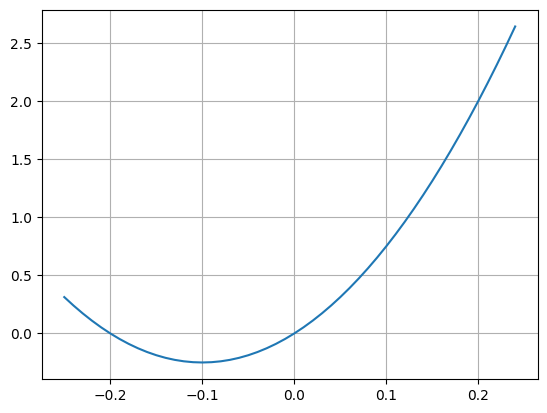

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plot_x = np.arange(-0.25, 0.25, 0.01)

plt.grid()
plt.plot(plot_x, error(plot_x))

In [ ]:
import torch

w_init = 2.0
max_iteration = 200

w = torch.tensor(w_init, requires_grad=True)
optimizer = torch.optim.SGD([w])

for _ in range(max_iteration):
    target_value = error(w)

    optimizer.zero_grad()
    target_value.backward()

    optimizer.step()


In [ ]:
w

tensor(-0.0999, requires_grad=True)

2. 1変数関数について、OptimizerのAdamを試しなさい。

In [ ]:
w_init = 2.0
max_iteration = 2000

w = torch.tensor(w_init, requires_grad=True)
optimizer = torch.optim.Adam([w], lr=0.01)

for _ in range(max_iteration):
    target_value = error(w)

    optimizer.zero_grad()
    target_value.backward()

    optimizer.step()

In [ ]:
w

tensor(-0.1000, requires_grad=True)

3. 他のOptimizerについて調べて、実装しなさい。

In [ ]:
# RMSProp

w_init = 2.0
max_iteration = 200

w = torch.tensor(w_init, requires_grad=True)
optimizer = torch.optim.RMSprop([w])

for _ in range(max_iteration):
    target_value = error(w)

    optimizer.zero_grad()
    target_value.backward()

    optimizer.step()

In [ ]:
w

tensor(0.0120, requires_grad=True)

In [ ]:
# Adadelta

w_init = 2.0
max_iteration = 200

w = torch.tensor(w_init, requires_grad=True)
optimizer = torch.optim.Adadelta([w])

for _ in range(max_iteration):
    target_value = error(w)

    optimizer.zero_grad()
    target_value.backward()

    optimizer.step()

In [ ]:
w

tensor(1.2082, requires_grad=True)

In [ ]:
# AdaGrad

w_init = 2.0
max_iteration = 200

w = torch.tensor(w_init, requires_grad=True)
optimizer = torch.optim.Adagrad([w])

for _ in range(max_iteration):
    target_value = error(w)

    optimizer.zero_grad()
    target_value.backward()

    optimizer.step()

In [ ]:
w

tensor(1.7378, requires_grad=True)

In [ ]:
# Nadam

w_init = 2.0
max_iteration = 200

w = torch.tensor(w_init, requires_grad=True)
optimizer = torch.optim.NAdam([w])

for _ in range(max_iteration):
    target_value = error(w)

    optimizer.zero_grad()
    target_value.backward()

    optimizer.step()

In [ ]:
w

tensor(1.6242, requires_grad=True)

## 第6回

2値分類のデータセットを用いて、ロジスティック回帰を実装しなさい。また、どのようなoptimizer (solver) を用いたか、答えなさい。

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [49]:
raw_df = pd.read_csv("./data/SpotifyDataset.csv").iloc[:100, :]
raw_df

,rank,Artist,Title,Image URL,Release Date,Popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_sec,time_signature,Preview URL
0,1,YOASOBI,アイドル,https://i.scdn.co/image/ab67616d0000b273b7d6ca...,2023-04-12,84,0.574,0.935,1,-2.783,...,0.0926,0.11200,0.000001,0.3670,0.836,166.008,213234,213.234,4,https://p.scdn.co/mp3-preview/3cf6efcc13a38048...
1,2,OFFICIAL HIGE DANDISM,Subtitle,https://i.scdn.co/image/ab67616d0000b273d69b54...,2022-10-12,76,0.649,0.683,6,-6.490,...,0.0424,0.03130,0.000000,0.1180,0.381,130.000,305509,305.509,4,https://p.scdn.co/mp3-preview/cff6c39aef4b4984...
2,3,Jung Kook,Seven,https://i.scdn.co/image/ab67616d0000b273bf5cce...,2023-07-14,97,0.802,0.832,11,-4.107,...,0.0434,0.31100,0.000000,0.0815,0.890,124.997,185427,185.427,4,https://p.scdn.co/mp3-preview/2f2b3f4eaf405ac3...
3,4,BTS,Butter,https://i.scdn.co/image/ab67616d0000b273240447...,2021-06-04,73,0.759,0.459,8,-5.187,...,0.0948,0.00323,0.000000,0.0906,0.695,109.997,164442,164.442,4,https://p.scdn.co/mp3-preview/4d63fe1638aa4159...
4,5,Mariah Carey,All I Want for Christmas Is You,https://i.scdn.co/image/ab67616d0000b2734246e3...,1994-10-28,84,0.336,0.627,7,-7.463,...,0.0384,0.16400,0.000000,0.0708,0.350,150.273,241107,241.107,4,https://p.scdn.co/mp3-preview/6b1557cd25d54394...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Coldplay,My Universe,https://i.scdn.co/image/ab67616d0000b273f60a9b...,2021-09-24,81,0.588,0.701,9,-6.390,...,0.0402,0.00813,0.000000,0.2000,0.443,104.988,228000,228.000,4,https://p.scdn.co/mp3-preview/e6b780d0df792711...
96,97,YOASOBI,ハルジオン,https://i.scdn.co/image/ab67616d0000b2734d9235...,2020-05-11,64,0.686,0.902,0,-2.657,...,0.0340,0.05910,0.000000,0.3330,0.901,130.020,198000,198.000,4,https://p.scdn.co/mp3-preview/34cd4efe36e38bdc...
97,98,音田 雅則,fake face dance music,https://i.scdn.co/image/ab67616d0000b2733ea164...,2023-07-11,76,0.812,0.640,1,-8.034,...,0.0564,0.08750,0.000000,0.3960,0.893,116.992,151016,151.016,4,https://p.scdn.co/mp3-preview/f83787bd714792c8...
98,99,ZUTOMAYO,残機,https://i.scdn.co/image/ab67616d0000b273cc23f5...,2022-10-18,63,0.667,0.903,2,-2.965,...,0.0732,0.40300,0.000000,0.1190,0.849,140.981,230067,230.067,4,NaN


In [50]:
raw_df.columns

Index(['rank', 'Artist', 'Title', 'Image URL', 'Release Date', 'Popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'duration_sec', 'time_signature', 'Preview URL'],
      dtype='object')

In [51]:
df = raw_df.drop(columns=["rank", "Artist", "Title", "Image URL", "Release Date", "Preview URL"])
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_sec,time_signature
0,84,0.574,0.935,1,-2.783,1,0.0926,0.11200,0.000001,0.3670,0.836,166.008,213234,213.234,4
1,76,0.649,0.683,6,-6.490,1,0.0424,0.03130,0.000000,0.1180,0.381,130.000,305509,305.509,4
2,97,0.802,0.832,11,-4.107,1,0.0434,0.31100,0.000000,0.0815,0.890,124.997,185427,185.427,4
3,73,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,0.0906,0.695,109.997,164442,164.442,4
4,84,0.336,0.627,7,-7.463,1,0.0384,0.16400,0.000000,0.0708,0.350,150.273,241107,241.107,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,81,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.000000,0.2000,0.443,104.988,228000,228.000,4
96,64,0.686,0.902,0,-2.657,0,0.0340,0.05910,0.000000,0.3330,0.901,130.020,198000,198.000,4
97,76,0.812,0.640,1,-8.034,1,0.0564,0.08750,0.000000,0.3960,0.893,116.992,151016,151.016,4
98,63,0.667,0.903,2,-2.965,1,0.0732,0.40300,0.000000,0.1190,0.849,140.981,230067,230.067,4


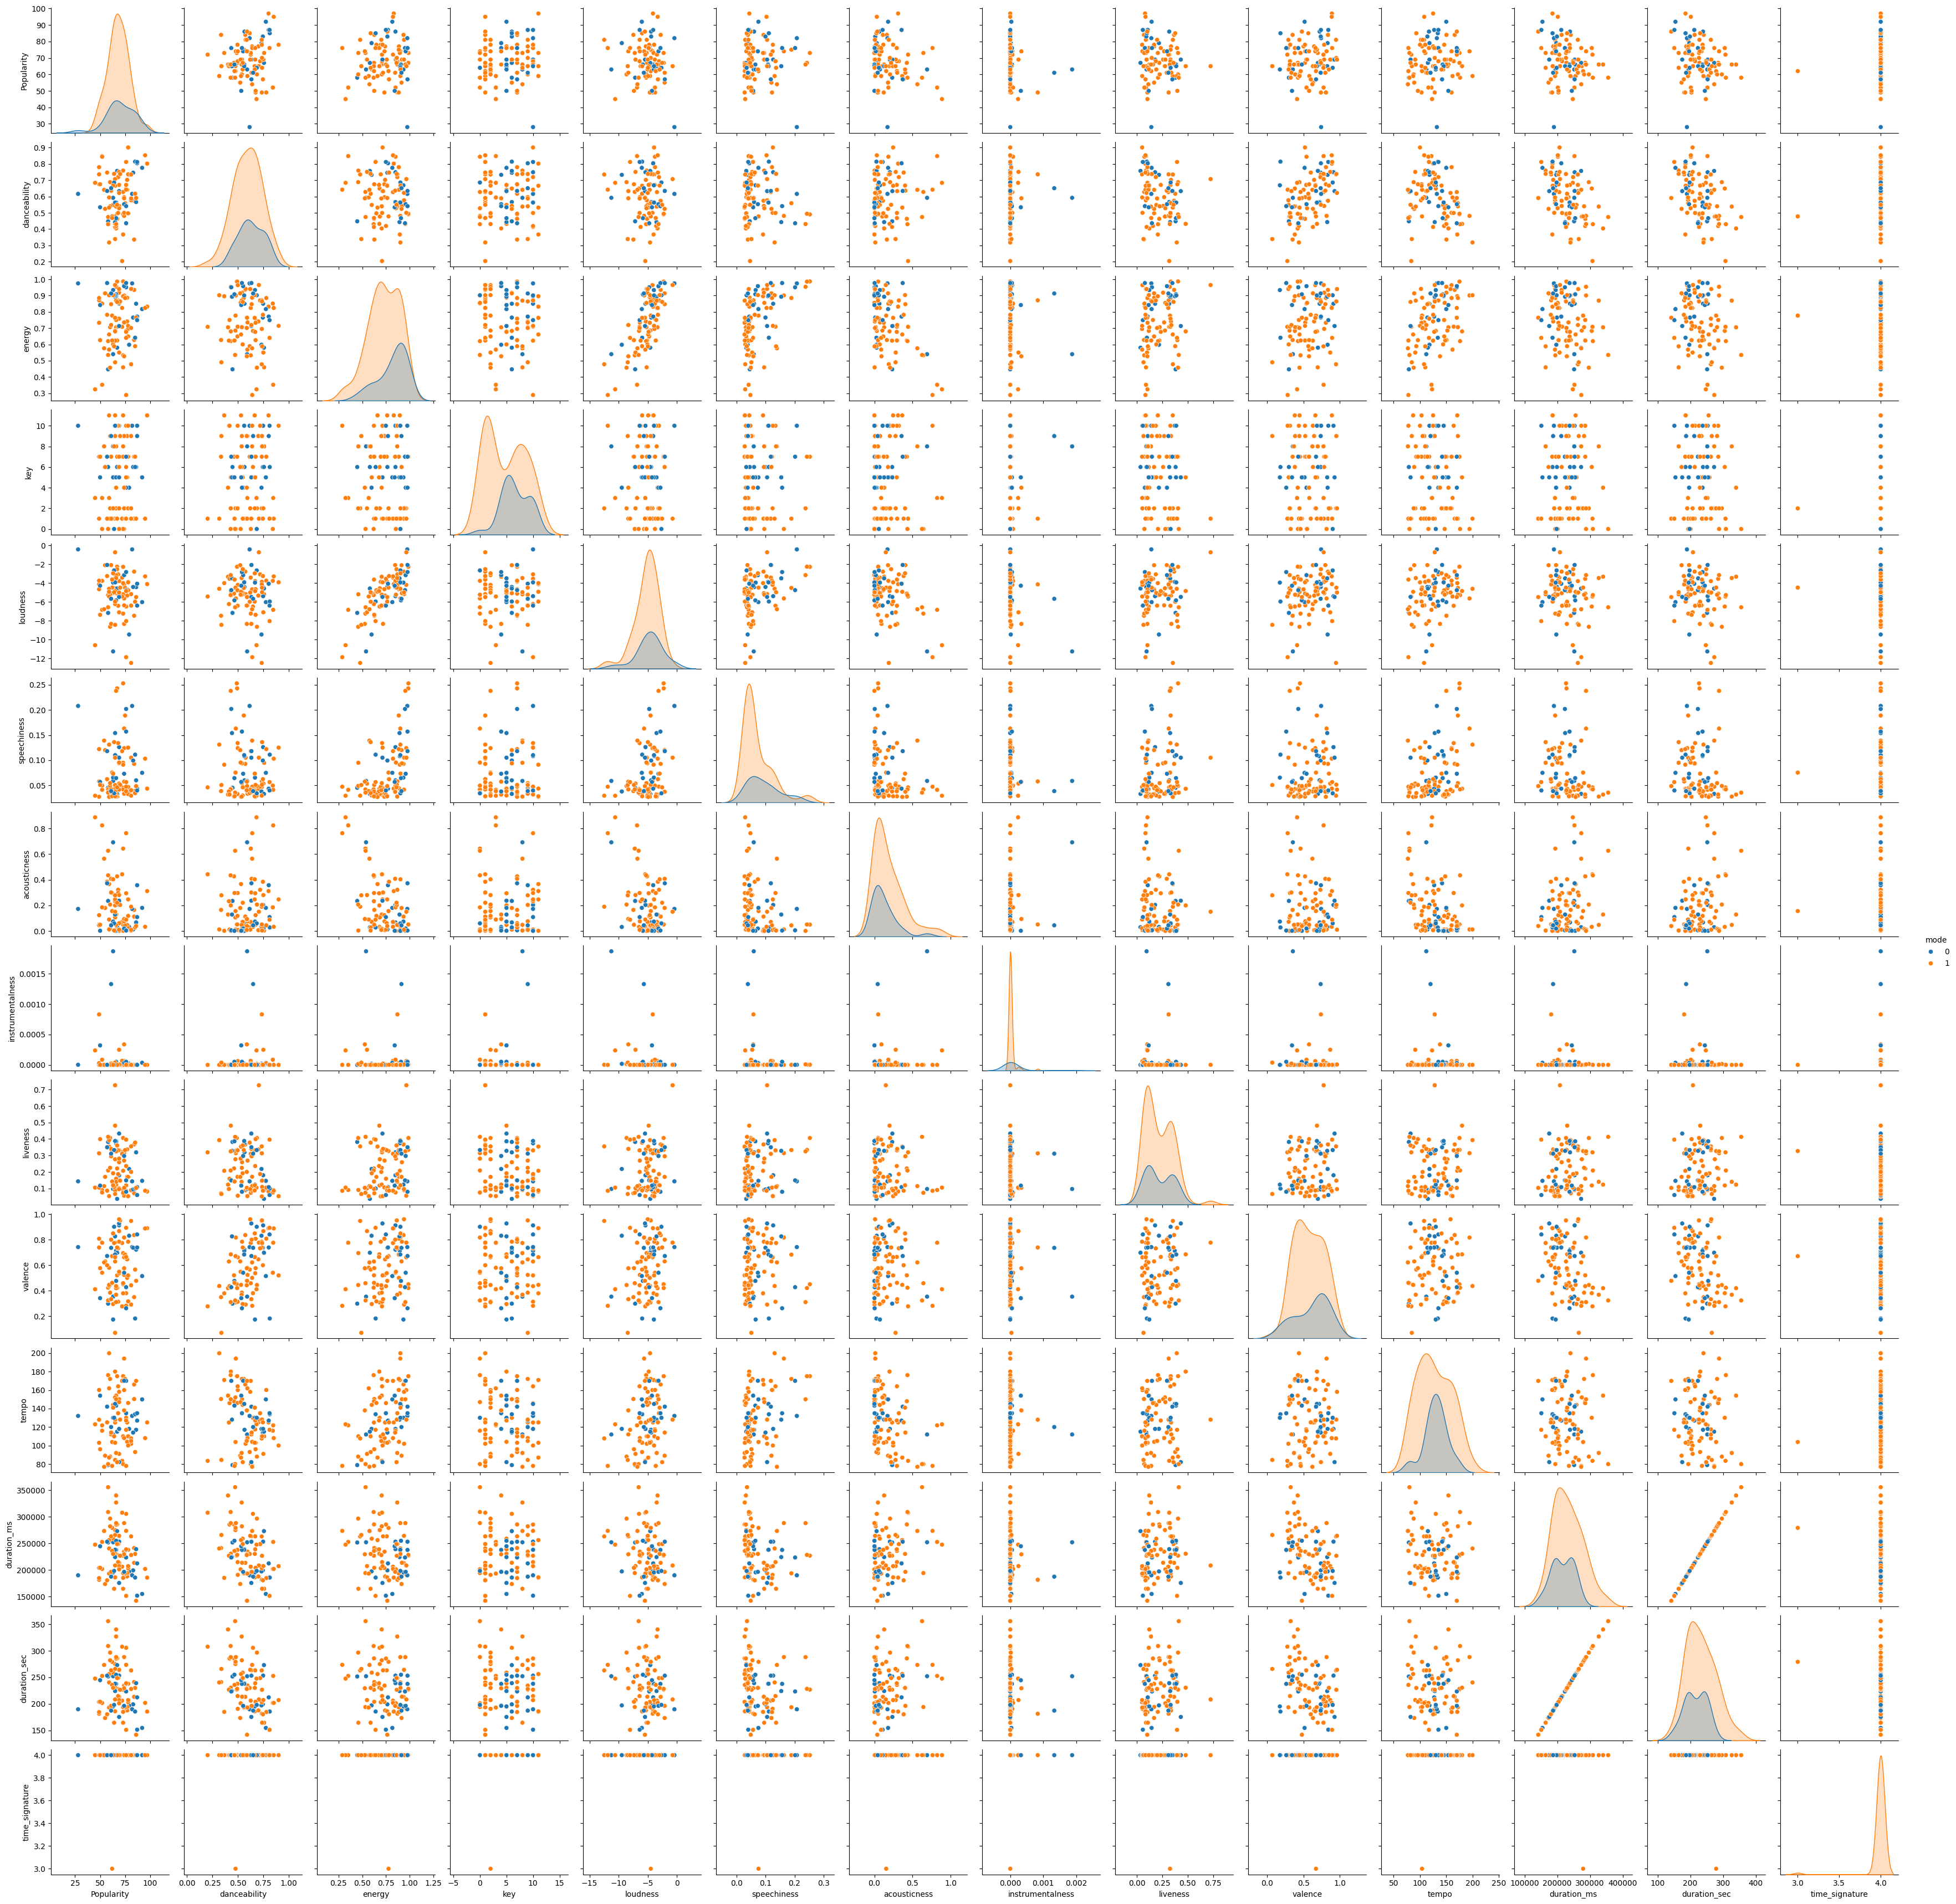

In [52]:
sns.pairplot(df, hue="mode")

In [53]:
X = df[["energy", "danceability"]]
y = df["mode"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
X_train

,energy,danceability
74,0.713,0.633
67,0.714,0.901
76,0.535,0.474
77,0.977,0.541
35,0.649,0.497
...,...,...
54,0.750,0.419
4,0.627,0.336
33,0.533,0.628
32,0.918,0.542


In [55]:
y_train

74    0
67    1
76    1
77    0
35    1
     ..
54    1
4     1
33    1
32    1
46    1
Name: mode, Length: 80, dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression(
    max_iter=100,
    solver="lbfgs"
)

In [58]:
model.fit(X_train, y_train)

LogisticRegression()

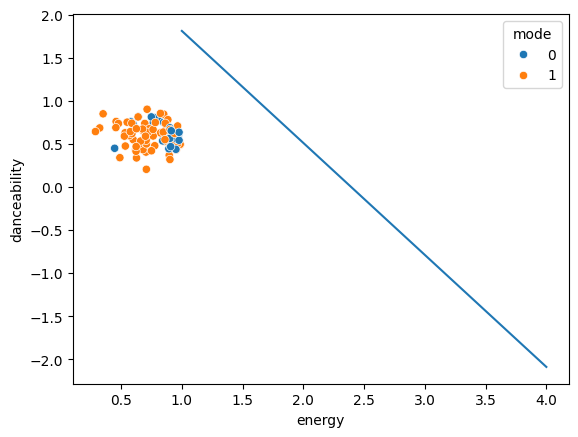

In [64]:
b = model.intercept_[0]
w = model.coef_[0]

bound_x = np.linspace(1, 4, 100)
bound_y = - (w[0]/w[1]) * bound_x -b / w[1]

sns.scatterplot(df, x=df["energy"], y=df["danceability"], hue="mode")
plt.plot(bound_x, bound_y)

---

1. 作ったニューラルネットに乱数を入力して、正しく出力することを確認しなさい。

2. ３層以上に変更してください。ユニット数

3. penguinsのデータセットをきちんと作りなさい